# Analysis of Yelp Business Intelligence Data
## Part 1
### Installation and Initial Setup

In [1]:
from pyspark.sql import SparkSession
spark = SparkSession \
.builder \
.appName("Python Spark SQL basic example") \
.config("spark.some.config.option", "some-value") \
.getOrCreate()
sc.install_pypi_package("pandas==1.0.3")
sc.install_pypi_package("matplotlib==3.2.1")
sc.install_pypi_package("seaborn==0.10.0")

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
2,application_1606117717112_0003,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached https://files.pythonhosted.org/packages/4a/6a/94b219b8ea0f2d580169e85ed1edc0163743f55aaeca8a44c2e8fc1e344e/pandas-1.0.3-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/d4/70/d60450c3dd48ef87586924207ae8907090de0b306af2bce5d134d78615cb/python_dateutil-2.8.1-py2.py3-none-any.whl

  Using cached https://files.pythonhosted.org/packages/b2/c2/71fcf957710f3ba1f09088b35776a799ba7dd95f7c2b195ec800933b276b/matplotlib-3.2.1-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/8a/bb/488841f56197b13700afd5658fc279a2025a39e22449b7cf29864669b15d/pyparsing-2.4.7-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/f7/d2/e07d3ebb2bd7af696440ce7e754c59dd546ffe1bbe732c8ab68b9c834e61/cycler-0.10.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/d2/46/231de802ade4225b76b96cffe419cf3ce52bbe92e3b092cf12db7d11c207/kiwisolver-1.3.1-cp37-cp37m-manylinux1_x86_64.whl

  Usi

### Importing & Loading Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = spark.read.json('s3://sta9760-project02-dataset/yelp_academic_dataset_business.json')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

### Overview of Data

In [3]:
print(f'Columns: {len(df.dtypes)} | Rows: {df.count():,}')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Columns: 14 | Rows: 209,393

In [4]:
df.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- address: string (nullable = true)
 |-- attributes: struct (nullable = true)
 |    |-- AcceptsInsurance: string (nullable = true)
 |    |-- AgesAllowed: string (nullable = true)
 |    |-- Alcohol: string (nullable = true)
 |    |-- Ambience: string (nullable = true)
 |    |-- BYOB: string (nullable = true)
 |    |-- BYOBCorkage: string (nullable = true)
 |    |-- BestNights: string (nullable = true)
 |    |-- BikeParking: string (nullable = true)
 |    |-- BusinessAcceptsBitcoin: string (nullable = true)
 |    |-- BusinessAcceptsCreditCards: string (nullable = true)
 |    |-- BusinessParking: string (nullable = true)
 |    |-- ByAppointmentOnly: string (nullable = true)
 |    |-- Caters: string (nullable = true)
 |    |-- CoatCheck: string (nullable = true)
 |    |-- Corkage: string (nullable = true)
 |    |-- DietaryRestrictions: string (nullable = true)
 |    |-- DogsAllowed: string (nullable = true)
 |    |-- DriveThru: string (nullable = true)
 |    |-- GoodForDancing: str

Display the first 5 rows with the following columns:

* business_id
* name
* city
* state
* categories

In [5]:
df.select(df['business_id'], df['name'], df['city'], df['state'], df['stars'], df['categories']).show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+---------------+-----+-----+--------------------+
|         business_id|                name|           city|state|stars|          categories|
+--------------------+--------------------+---------------+-----+-----+--------------------+
|f9NumwFMBDn751xgF...|The Range At Lake...|      Cornelius|   NC|  3.5|Active Life, Gun/...|
|Yzvjg0SayhoZgCljU...|   Carlos Santo, NMD|     Scottsdale|   AZ|  5.0|Health & Medical,...|
|XNoUzKckATkOD1hP6...|             Felinus|       Montreal|   QC|  5.0|Pets, Pet Service...|
|6OAZjbxqM5ol29BuH...|Nevada House of Hose|North Las Vegas|   NV|  2.5|Hardware Stores, ...|
|51M2Kk903DFYI6gnB...|USE MY GUY SERVIC...|           Mesa|   AZ|  4.5|Home Services, Pl...|
+--------------------+--------------------+---------------+-----+-----+--------------------+
only showing top 5 rows

## Part 2
### Analyzing Categories
* Association Table
* Total Unique Categories
* Top Categories By Business
* Bar Chart of Top Categories

### Association Table

In [6]:
df.createOrReplaceTempView('business')

sqldf = spark.sql(
'''
SELECT *, EXPLODE(SPLIT(categories,', ')) AS category 
FROM business
'''
)

sqldf.createOrReplaceTempView('category')

association = spark.sql(
'''
SELECT business_id, category 
FROM category 
LIMIT 5
'''
)

association.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+----------------+
|         business_id|        category|
+--------------------+----------------+
|f9NumwFMBDn751xgF...|     Active Life|
|f9NumwFMBDn751xgF...|Gun/Rifle Ranges|
|f9NumwFMBDn751xgF...|     Guns & Ammo|
|f9NumwFMBDn751xgF...|        Shopping|
|Yzvjg0SayhoZgCljU...|Health & Medical|
+--------------------+----------------+

### Total Unique Categories

In [7]:
uni_categories_count = spark.sql(
'''
SELECT COUNT(DISTINCT category) as unique_category
FROM category
'''
)

uni_categories_count.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------------+
|unique_category|
+---------------+
|           1336|
+---------------+

### Top Categories By Business

In [8]:
top_20 = spark.sql(
'''
SELECT category, COUNT(*) AS count
FROM category
GROUP BY category
ORDER BY count DESC
LIMIT 20
'''
)

top_20.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+
|            category|count|
+--------------------+-----+
|         Restaurants|63944|
|            Shopping|34644|
|                Food|32991|
|       Home Services|22487|
|       Beauty & Spas|20520|
|    Health & Medical|19227|
|      Local Services|15783|
|          Automotive|14720|
|           Nightlife|14211|
|                Bars|12400|
|Event Planning & ...|11263|
|         Active Life|10225|
|        Coffee & Tea| 8415|
|             Fashion| 8374|
|           Fast Food| 8106|
|          Sandwiches| 8064|
|American (Traditi...| 7596|
|       Home & Garden| 7331|
|         Hair Salons| 7303|
|               Pizza| 7302|
+--------------------+-----+

### Bar Chart of Top Categories

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

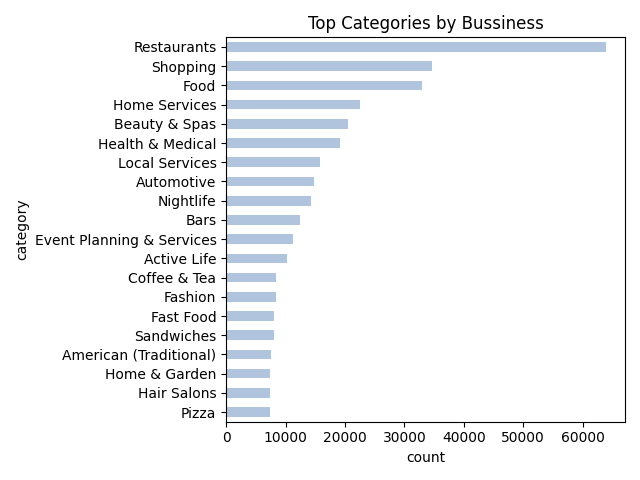

In [9]:
top_20.toPandas().plot.barh(y = 'count', x = 'category', color = 'lightsteelblue', legend=None)
plt.title('Top Categories by Bussiness')
plt.ylabel('category')
plt.xlabel('count')
plt.gca().invert_yaxis()
plt.tight_layout()

%matplot plt

## Part 3
### Do Yelp Reviews Skew Negative?
For this next part, you will attempt to answer the question: are the (written) reviews generally more pessimistic or more optimistic as compared to the overall business rating.

### Loading User Data

In [10]:
df_review = spark.read.json('s3://sta9760-project02-dataset/yelp_academic_dataset_review.json')
df_review.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- business_id: string (nullable = true)
 |-- cool: long (nullable = true)
 |-- date: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- review_id: string (nullable = true)
 |-- stars: double (nullable = true)
 |-- text: string (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)

In [11]:
df_review[df_review['business_id'], df_review['stars']].show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+
|         business_id|stars|
+--------------------+-----+
|-MhfebM0QIsKt87iD...|  2.0|
|lbrU8StCq3yDfr-QM...|  1.0|
|HQl28KMwrEKHqhFrr...|  5.0|
|5JxlZaqCnk1MnbgRi...|  1.0|
|IS4cv902ykd8wj1TR...|  4.0|
+--------------------+-----+
only showing top 5 rows

### Rating by users who took the time to submit a written review

In [12]:
df_review.createOrReplaceTempView('review')

do_review_rating = spark.sql(
'''
SELECT business_id, AVG(stars) AS `avg(stars)`
FROM review
WHERE text IS NOT NULL
GROUP BY business_id
'''
)

do_review_rating.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+------------------+
|         business_id|        avg(stars)|
+--------------------+------------------+
|RMjCnixEY5i12Ciqn...|3.5316455696202533|
|VHsNB3pdGVcRgs6C3...| 3.411764705882353|
|kpbhERZoj1eTDRnMV...| 2.033333333333333|
|ipFreSFhjClfNETuM...|               2.6|
|9A_mB7Ez3RIh26EN5...|               2.6|
+--------------------+------------------+
only showing top 5 rows

### Join two dataframes (reviews and business data) 

In [13]:
do_review_rating.createOrReplaceTempView('dReview')

review_business_data = spark.sql(
'''
SELECT *
FROM business b
JOIN dReview d
ON b.business_id = d.business_id
'''
)

review_business_data.createOrReplaceTempView("review_business_data")

join_rbd_table = spark.sql(
'''
SELECT `avg(stars)`, stars, name, city, state
FROM review_business_data
ORDER BY `avg(stars)` DESC
'''
)

join_rbd_table.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------+-----+--------------------+----------+-----+
|avg(stars)|stars|                name|      city|state|
+----------+-----+--------------------+----------+-----+
|       5.0|  5.0|  Larry Fafalak, LMT| Las Vegas|   NV|
|       5.0|  5.0|   Rentech Solutions|Willoughby|   OH|
|       5.0|  5.0|Everest Curry and...|   Calgary|   AB|
|       5.0|  5.0|Krown Rust Contro...|   Markham|   ON|
|       5.0|  5.0|     EVO Swim School|      Mesa|   AZ|
+----------+-----+--------------------+----------+-----+
only showing top 5 rows

### Calculates the skewness

In [14]:
join_rbd_table.createOrReplaceTempView('join_table')

distri = spark.sql(
'''
SELECT (`avg(stars)` - stars)/ stars AS skew
FROM join_table
'''
)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

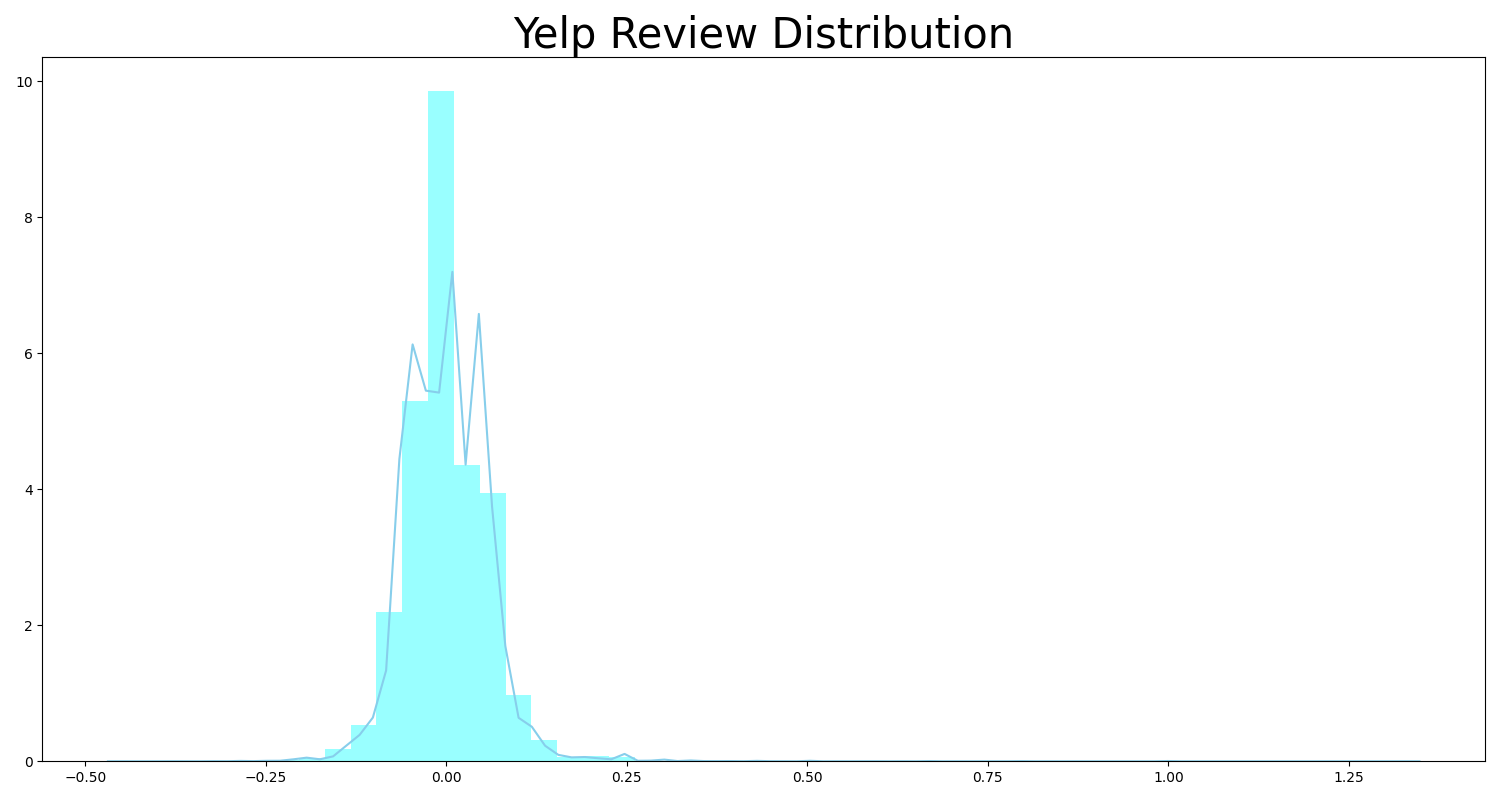

In [15]:
skew = distri.toPandas()
fig = plt.figure(figsize=(15,8))
plot = sns.distplot(skew, color='skyblue',hist_kws={'color':'cyan'})
plt.title('Yelp Review Distribution', fontsize=30)
plt.tight_layout()

%matplot plt

In [16]:
print(f'Total number of review rating data:{df_review.count()}',
      f'Total number of do review rating data:{do_review_rating.count()}', sep='\n')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Total number of review rating data:8021122
Total number of do review rating data:209393

### Analysis for part 3

* From the graph above, the different between the average rating and the rating with written review seems to follow a noraml distribution, which might indicate that there is no skewness. Besides, the proportion of do review rating data is only about 2.5% of the toal number of data, we can ignore the effects that using the average star of all data in the deductions of fraction to calculate the skewness instead of the average star of data with no review. Therefore it's fair to say that the arguement that "only people who write a written review are those who are extremely dissatisfied or extremely satisfied with the service received" is not quite true.


### Further Discussion
* On the other hand, we know that some reviewers might only leave a very short comment, such as "good", "excellent"...etc. So taking these rating of short reviews as do review rating may have bias.
* Intead of using do review/ not do review rating, I divide the short review and long review by the length of text(50) to make further examination.

In [17]:
short_review_rating = spark.sql(
'''
SELECT business_id, AVG(stars) AS `avg(stars) with short review`
FROM review
WHERE LENGTH(text) < 50
GROUP BY business_id
'''
)

long_review_rating = spark.sql(
'''
SELECT business_id, AVG(stars) AS `avg(stars) with long review`
FROM review
WHERE LENGTH(text) > 50
GROUP BY business_id
'''
)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [18]:
print(f'Total number of short review rating data:{short_review_rating.count()}',
      f'Total number of long review rating data:{long_review_rating.count()}', sep='\n')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Total number of short review rating data:7740
Total number of long review rating data:209393

* The proportion of short review rating data of the toal number of data is very small , we can ignore the effects.

* I then exam the skew of short/long review rating.

In [19]:
short_review_rating.createOrReplaceTempView("short_review_rating")
long_review_rating.createOrReplaceTempView("long_review_rating")

skew_2 = spark.sql(
'''
SELECT (`avg(stars) with short review` - `avg(stars) with long review`)/`avg(stars) with long review` AS skew_2
FROM short_review_rating s
JOIN long_review_rating l
ON s.business_id = l.business_id
ORDER BY 1 DESC
'''
)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

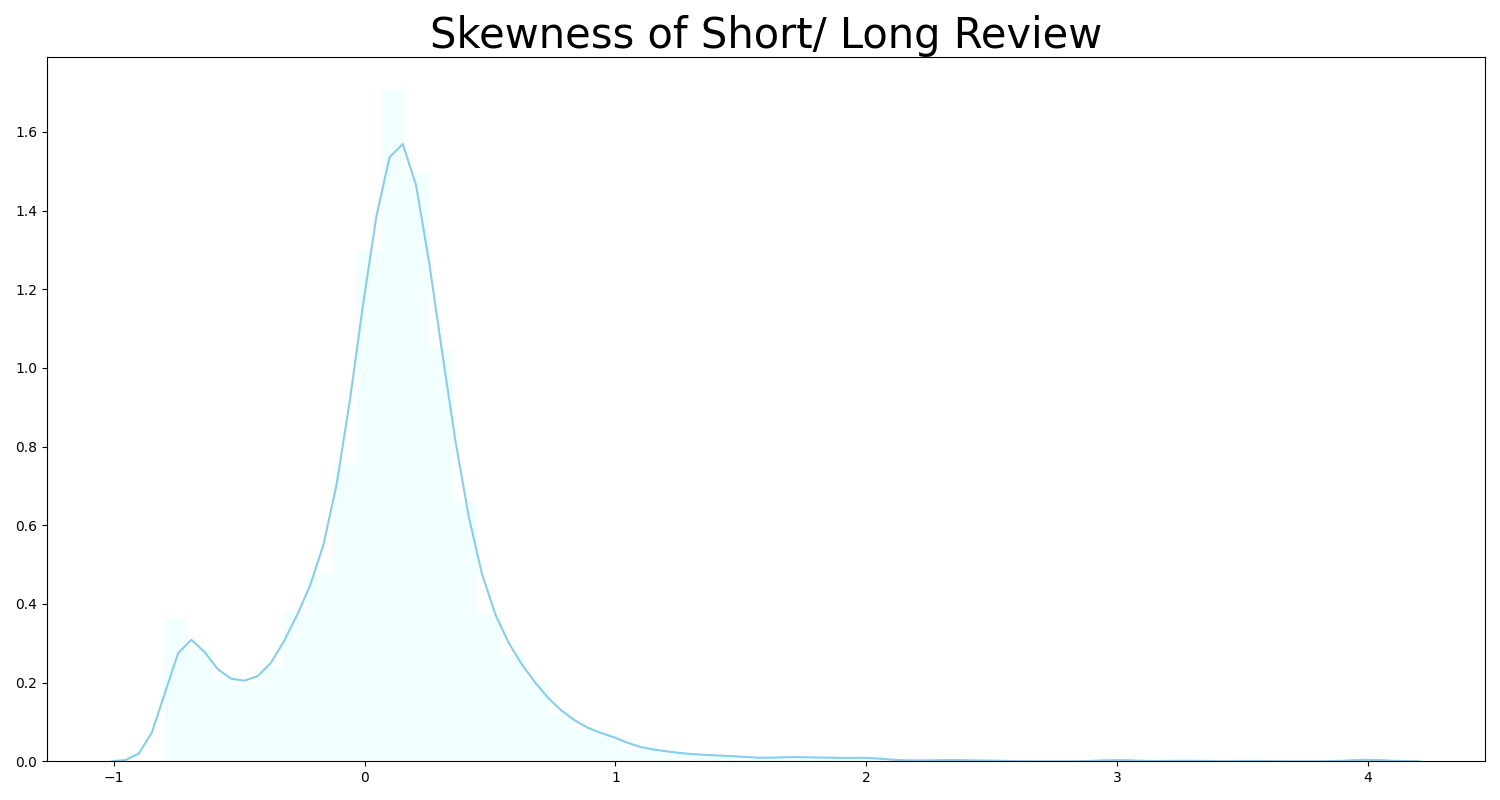

In [20]:
skew_2 = skew_2.toPandas()
fig = plt.figure(figsize=(15,8))
plot= sns.distplot(skew_2, color='skyblue',hist_kws={'color':'lightcyan'})
plt.title('Skewness of Short/ Long Review', fontsize=30)
plt.tight_layout()

%matplot plt

* The graph above shows that the skew is positive, we can interpret that to be: reviewers who left a short written response gave much higher rating than reviewers who left a long review on average.

## Part 4
### Should the Elite be Trusted? 

### Loading User Data

In [21]:
df_user = spark.read.json('s3://sta9760-project02-dataset/yelp_academic_dataset_user.json')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [22]:
df_user.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- average_stars: double (nullable = true)
 |-- compliment_cool: long (nullable = true)
 |-- compliment_cute: long (nullable = true)
 |-- compliment_funny: long (nullable = true)
 |-- compliment_hot: long (nullable = true)
 |-- compliment_list: long (nullable = true)
 |-- compliment_more: long (nullable = true)
 |-- compliment_note: long (nullable = true)
 |-- compliment_photos: long (nullable = true)
 |-- compliment_plain: long (nullable = true)
 |-- compliment_profile: long (nullable = true)
 |-- compliment_writer: long (nullable = true)
 |-- cool: long (nullable = true)
 |-- elite: string (nullable = true)
 |-- fans: long (nullable = true)
 |-- friends: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- name: string (nullable = true)
 |-- review_count: long (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)
 |-- yelping_since: string (nullable = true)

In [23]:
df_user.select(df_user['user_id'],df_user['elite']).show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+
|             user_id|               elite|
+--------------------+--------------------+
|ntlvfPzc8eglqvk92...|                    |
|FOBRPlBHa3WPHFB5q...|2008,2009,2010,20...|
|zZUnPeh2hEp0WydbA...|                2010|
|QaELAmRcDc5TfJEyl...|                2009|
|xvu8G900tezTzbbfq...|2009,2010,2011,20...|
+--------------------+--------------------+
only showing top 5 rows

### Number of Elite

In [24]:
df_user.createOrReplaceTempView("user")

num_E = spark.sql(
'''
SELECT COUNT(*) AS `number of elite`
FROM user u
JOIN review r
ON u.user_id = r.user_id
WHERE elite LIKE '%20%'
'''
)

num_E.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------------+
|number of elite|
+---------------+
|        1756327|
+---------------+

### Avg. Rating from Elite

In [25]:
avgR_from_E = spark.sql(
'''
SELECT SUM(average_stars)/ COUNT(*) AS `avgstars from elite`
FROM user u
JOIN review r
ON u.user_id = r.user_id
WHERE elite LIKE '%20%'
'''
)

avgR_from_E.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+
|avgstars from elite|
+-------------------+
| 3.8541299199978103|
+-------------------+

### Avg. Rating from Pedestrian

In [26]:
avgR_from_P = spark.sql(
'''
SELECT SUM(average_stars)/ COUNT(*) AS `avgstars from pedestrian`
FROM user u
JOIN review r
ON u.user_id = r.user_id
WHERE elite NOT LIKE '%20%'
'''
)

avgR_from_P.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------------------+
|avgstars from pedestrian|
+------------------------+
|        3.68831514838085|
+------------------------+

In [27]:
# Join tables
df_elite_user = spark.sql(
'''
SELECT r.business_id, AVG(r.stars) AS `avg.star from Elite`
FROM user u
JOIN review r
ON u.user_id = r.user_id
WHERE elite LIKE '20%'
GROUP BY r.business_id
'''
)

df_ped_user = spark.sql(
'''
SELECT r.business_id, AVG(r.stars) AS `avg.star from Pedestrian`
FROM user u
JOIN review r
ON u.user_id = r.user_id
WHERE elite NOT LIKE '20%'
GROUP BY r.business_id
'''
)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

### Rating difference

In [28]:
df_elite_user.createOrReplaceTempView("elite_user")
df_ped_user.createOrReplaceTempView("ped_user")

diff = spark.sql(
'''
SELECT (`avg.star from Elite` - `avg.star from Pedestrian`) AS diff
FROM elite_user e
JOIN ped_user p
ON e.business_id = p.business_id
ORDER BY 1 DESC
'''
)

diff.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----+
|diff|
+----+
| 4.0|
| 4.0|
| 4.0|
| 4.0|
| 4.0|
+----+
only showing top 5 rows

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

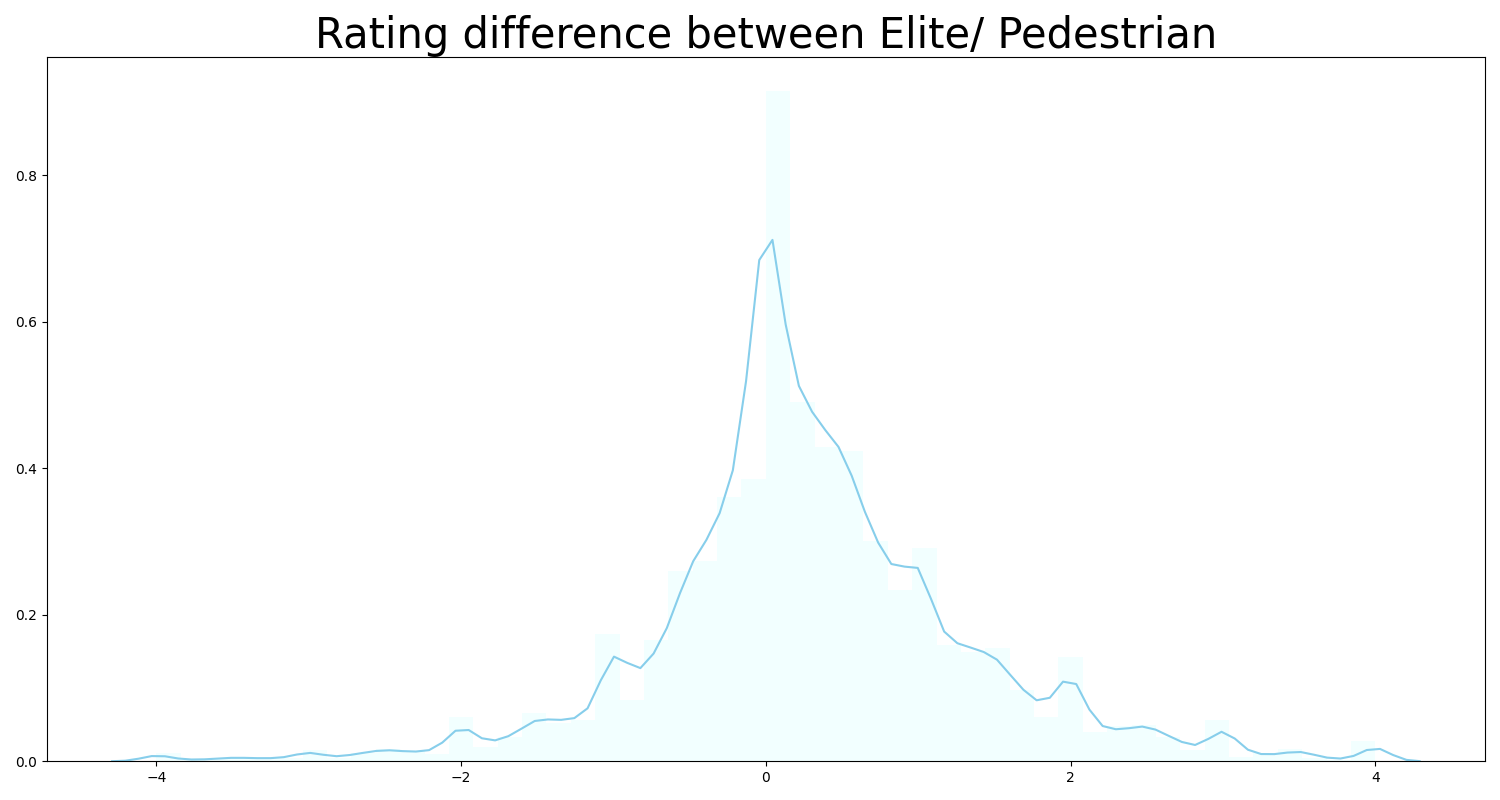

In [29]:
diff = diff.toPandas()
fig = plt.figure(figsize=(15,8))
plot= sns.distplot(diff, color='skyblue',hist_kws={'color':'lightcyan'})
plt.title('Rating difference between Elite/ Pedestrian', fontsize=30)
plt.tight_layout()

%matplot plt

In [30]:
print(diff.describe())

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

                diff
count  146479.000000
mean        0.296621
std         1.044539
min        -4.000000
25%        -0.214286
50%         0.195538
75%         0.811914
max         4.000000

* From the graph above, there are not much different between the average rating from elite and pedestrian. 
* The avg.star from elite is slightly higher than from pedestrian.
###    
* According to these two results above, I think we can trust elite user although sometimes they might give a little higher rating than pedestrian. The possible reason for this slightly deviation is that some elite might have cooperation with the business, the rating is just a result of advertorial. Nonetheless, the deviation is acceptable for me. If someone really care about this deviation, they can lower the rating a bit from elite on themself.

## Other Analysis

### Effects on fans number from number of review/ useful review

In [31]:
effects_on_fan_num_review = spark.sql(
'''
SELECT SUM(fans)/ SUM(review_count) AS `effect on fan from number of review`
FROM user
'''
)

effects_on_fan_num_review.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------------------------------+
|effect on fan from number of review|
+-----------------------------------+
|                0.06580379113050557|
+-----------------------------------+

In [32]:
effects_on_fan_useful_review = spark.sql(
'''
SELECT SUM(fans)/ SUM(useful) AS `effect on fan from useful of review`
FROM user
'''
)

effects_on_fan_useful_review.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------------------------------+
|effect on fan from useful of review|
+-----------------------------------+
|                0.03662893096969366|
+-----------------------------------+

* From the results above, it seems that the user should focus on increasing the number of the review rather than focus on the qulity of review if they want to efficiently increase the fans number.